## Importing data, exploring columns, cleansing/converting, and creating new columns for better measurement (Boolean/categorical)

## Summary: Write summary of edits

Cleaned
- Duplicate id records - kept record with most recent date for most recent data
- Filled nulls for 
    - ['view'] = 99.0 (extreme value)
    - ['sqft_basement'] = 9999.0 (extreme value)
    - [yr_renovated'] = 0.0 (others that had no data on renovation or had not been renovated also had this value)
    

Converted
- date from string to datetime
- yr_renovated from float to int

Added
- yr_of_sale from date
- mon_of_sale_num from date
- season_of_same from mon_of_sale_num
- mon_of_sale_name from mon_of_sale_num
- has_basement = 0 if does not have basement, 1 if has basement
- has_been_viewed = 0 if has not been viewed, 1 if has been viewed
- has_been_renovated = 0 if has not been renovated, 1 if has been renovated
- grade_category (Low, Average, High) to account for numerical grading on 12 levels
    - Low: 1-5
    - Average: 6-9
    - High: 10-13
- in_seattle = 0 if zipcode is not in Seattle, 1 if in Seattle (seattle_zipcodes is list variable)
- single_fam_home = 0 is bedrooms > 5, 1 if bedrooms >= 5


    
Edited
- ['view'] and ['sqft_basement'] extreme values replaces with means from original dataset so they wouldn't impact model target values

In [250]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as stats
import seaborn as sns

In [251]:
# Import data
data = pd.read_csv('../data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [252]:
# Overview of data types and completeness of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [253]:
# Overview of values
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [254]:
# Check for duplicate IDs
data['id'].duplicated().sum()

177

In [255]:
177/21597 
# Less than 1% of data loss in deduplicating

0.008195582719822198

In [256]:
# Sort table by ids to easily preview dupes
data = data.sort_values(by='id')

In [257]:
data.head()
# more recent date is first

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
6729,1200019,5/8/2014,647500.0,4,1.75,2060,26036,1.0,NaN,0.0,...,8,1160,900.0,1947,0.0,98166,47.4444,-122.351,2590,21891
8404,1200021,8/11/2014,400000.0,3,1.00,1460,43000,1.0,0.0,0.0,...,7,1460,0.0,1952,0.0,98166,47.4434,-122.347,2250,20023
8800,2800031,4/1/2015,235000.0,3,1.00,1430,7599,1.5,0.0,0.0,...,6,1010,420.0,1930,0.0,98168,47.4783,-122.265,1290,10320


In [258]:
# Sort by date
data = data.sort_values(by='date')
# Most recent date is last, we would want the latest assessment of the house

In [259]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12076,5437600140,1/10/2015,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,8,2240,0.0,2002,0.0,98042,47.3922,-122.165,1920,5288
20699,1982201596,1/12/2015,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,8,1020,610.0,2014,0.0,98107,47.6646,-122.367,1420,1670
4442,2767604252,1/12/2015,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,8,760,0.0,2006,0.0,98107,47.6715,-122.382,1290,1189
19283,7504100360,1/12/2015,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,9,2500,0.0,1983,0.0,98074,47.6346,-122.045,3380,12760
13017,2787700180,1/12/2015,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,7,1250,0.0,1968,0.0,98059,47.5066,-122.159,1620,7653


In [260]:
# Drop duplicate ids, but keep the last record of the duplicate. This keeps the most recent sale of house
data['id'].drop_duplicates(keep='last', inplace=True)

In [261]:
# Check work 
data['id'].duplicated().sum()

0

In [262]:
# Preview
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12076,5437600140,1/10/2015,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,8,2240,0.0,2002,0.0,98042,47.3922,-122.165,1920,5288
20699,1982201596,1/12/2015,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,8,1020,610.0,2014,0.0,98107,47.6646,-122.367,1420,1670
4442,2767604252,1/12/2015,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,8,760,0.0,2006,0.0,98107,47.6715,-122.382,1290,1189
19283,7504100360,1/12/2015,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,9,2500,0.0,1983,0.0,98074,47.6346,-122.045,3380,12760
13017,2787700180,1/12/2015,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,7,1250,0.0,1968,0.0,98059,47.5066,-122.159,1620,7653


In [263]:
# Reset index
data = data.reset_index(drop=True)

In [264]:
# Check work and preview
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5437600140,1/10/2015,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,8,2240,0.0,2002,0.0,98042,47.3922,-122.165,1920,5288
1,1982201596,1/12/2015,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,8,1020,610.0,2014,0.0,98107,47.6646,-122.367,1420,1670
2,2767604252,1/12/2015,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,8,760,0.0,2006,0.0,98107,47.6715,-122.382,1290,1189
3,7504100360,1/12/2015,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,9,2500,0.0,1983,0.0,98074,47.6346,-122.045,3380,12760
4,2787700180,1/12/2015,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,7,1250,0.0,1968,0.0,98059,47.5066,-122.159,1620,7653


In [265]:
# Convert date from string to datetime; pull example
data['date'][1]

'1/12/2015'

In [266]:
# Import package
from datetime import datetime

In [267]:
# Reassign Series to be in date time format
data['date'] = pd.to_datetime(data['date'],format='%m/%d/%Y')

In [268]:
data['yr_of_sale'] = pd.DatetimeIndex(data['date']).year

In [269]:
# Create month of sale by number
data['mon_of_sale_num'] = pd.DatetimeIndex(data['date']).month

In [270]:
# Create month of sale by name
import calendar
data['mon_of_sale_name'] = data['mon_of_sale_num'].apply(lambda x: calendar.month_abbr[x])

In [271]:
data.groupby(by='mon_of_sale_num')['id'].count()

mon_of_sale_num
1      978
2     1247
3     1875
4     2229
5     2414
6     2178
7     2211
8     1939
9     1771
10    1876
11    1409
12    1470
Name: id, dtype: int64

In [272]:
data.groupby(by='mon_of_sale_name')['id'].count()

mon_of_sale_name
Apr    2229
Aug    1939
Dec    1470
Feb    1247
Jan     978
Jul    2211
Jun    2178
Mar    1875
May    2414
Nov    1409
Oct    1876
Sep    1771
Name: id, dtype: int64

In [273]:
data['season_of_sale'] = 0
Winter = [12,1,2]
Spring = [3,4,5]
Summer = [6,7,8]
Fall = [9,10,11]

# Create season of sale
for row in data['mon_of_sale_num'].index:
    if data['mon_of_sale_num'][row] in Winter:
         data['season_of_sale'][row] = 'Winter'
    if data['mon_of_sale_num'][row] in Spring:
         data['season_of_sale'][row] = 'Spring'
    if data['mon_of_sale_num'][row] in Summer:
         data['season_of_sale'][row] = 'Summer'
    elif data['mon_of_sale_num'][row] in Fall:
        data['season_of_sale'][row] = 'Fall'

<ipython-input-273-6009843cb5fa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season_of_sale'][row] = 'Winter'
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-273-6009843cb5fa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season_of_sale'][row] = 'Fall'
<ipython-input-273-6009843cb5fa>:12:

In [274]:
data.groupby(by='season_of_sale')['id'].count()

season_of_sale
Fall      5056
Spring    6518
Summer    6328
Winter    3695
Name: id, dtype: int64

In [275]:
# Check work
print(data[data['mon_of_sale_num'].isin(Fall)]['id'].count())
print(data[data['mon_of_sale_num'].isin(Spring)]['id'].count())
print(data[data['mon_of_sale_num'].isin(Summer)]['id'].count())
print(data[data['mon_of_sale_num'].isin(Winter)]['id'].count())

5056
6518
6328
3695


In [276]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,0.0,98042,47.3922,-122.165,1920,5288,2015,1,Jan,Winter
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,0.0,98107,47.6646,-122.367,1420,1670,2015,1,Jan,Winter
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,0.0,98107,47.6715,-122.382,1290,1189,2015,1,Jan,Winter
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,0.0,98074,47.6346,-122.045,3380,12760,2015,1,Jan,Winter
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,0.0,98059,47.5066,-122.159,1620,7653,2015,1,Jan,Winter


In [277]:
# Check conversion was successful - datetime data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21597 non-null  int64         
 1   date              21597 non-null  datetime64[ns]
 2   price             21597 non-null  float64       
 3   bedrooms          21597 non-null  int64         
 4   bathrooms         21597 non-null  float64       
 5   sqft_living       21597 non-null  int64         
 6   sqft_lot          21597 non-null  int64         
 7   floors            21597 non-null  float64       
 8   waterfront        19221 non-null  float64       
 9   view              21534 non-null  float64       
 10  condition         21597 non-null  int64         
 11  grade             21597 non-null  int64         
 12  sqft_above        21597 non-null  int64         
 13  sqft_basement     21597 non-null  object        
 14  yr_built          2159

In [278]:
# Preview waterfront
data['waterfront'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [279]:
# View unique values, categorical/Boolean
data['waterfront'].unique()

array([ 0., nan,  1.])

In [280]:
# Categorical, thus need median for replacement
data['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [281]:
# Preview counts
data.groupby(by='waterfront')['id'].count()

waterfront
0.0    19075
1.0      146
Name: id, dtype: int64

In [282]:
# Fillna with median of 0 -- rightful value anyway as there is no waterfront or no data
data['waterfront'] = data['waterfront'].fillna(0.0)

In [283]:
# Check work 0.0 count increased
data.groupby(by='waterfront')['id'].count()

waterfront
0.0    21451
1.0      146
Name: id, dtype: int64

In [284]:
# Review overview of data to see waterfront has no nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21597 non-null  int64         
 1   date              21597 non-null  datetime64[ns]
 2   price             21597 non-null  float64       
 3   bedrooms          21597 non-null  int64         
 4   bathrooms         21597 non-null  float64       
 5   sqft_living       21597 non-null  int64         
 6   sqft_lot          21597 non-null  int64         
 7   floors            21597 non-null  float64       
 8   waterfront        21597 non-null  float64       
 9   view              21534 non-null  float64       
 10  condition         21597 non-null  int64         
 11  grade             21597 non-null  int64         
 12  sqft_above        21597 non-null  int64         
 13  sqft_basement     21597 non-null  object        
 14  yr_built          2159

In [285]:
# Preview view unique values
data['view'].unique()
# Unsure of what these values represent and not defined in column_names.md beyond "Has been viewed"

array([ 0.,  1.,  4.,  2.,  3., nan])

In [286]:
data['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [287]:
# Fill na with extreme value - 99
data['view'].fillna(99.0, inplace=True)

In [288]:
# Check work and get overview of data spread on 'view' column
data.groupby(by='view')['id'].count()

view
0.0     19422
1.0       330
2.0       957
3.0       508
4.0       317
99.0       63
Name: id, dtype: int64

In [289]:
# Convert and re-establish data as boolean "has_been_viewed"; create new column
data['has_been_viewed'] = 0
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,98042,47.3922,-122.165,1920,5288,2015,1,Jan,Winter,0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,98107,47.6646,-122.367,1420,1670,2015,1,Jan,Winter,0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,98107,47.6715,-122.382,1290,1189,2015,1,Jan,Winter,0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,98074,47.6346,-122.045,3380,12760,2015,1,Jan,Winter,0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,98059,47.5066,-122.159,1620,7653,2015,1,Jan,Winter,0


In [290]:
# For any data['view'] value that was not previously null, insert value of 1 in "has_been_viewed". For nulls insert 0.
for row in data['view'].index:
    if data['view'][row] < 99:
        data['has_been_viewed'][row] = 1 
    else:
        data['has_been_viewed'][row] = 0

<ipython-input-290-84c30200c21a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_been_viewed'][row] = 1
<ipython-input-290-84c30200c21a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_been_viewed'][row] = 0


In [291]:
# Check work; the 63 values that were 99.0 before are now 0 in 'has_been_viewed'
data.groupby(by='has_been_viewed')['id'].count()

has_been_viewed
0       63
1    21534
Name: id, dtype: int64

In [292]:
# Going through rest of columns to understand values
data['condition'].unique()
# Condition is on scale 1-5, but column_names.md doesn't define which is min or max

array([4, 3, 5, 2, 1])

In [293]:
# Plot to see sales price. higher overall condition can be tied to higher sales price
data.groupby(by='condition')['price'].mean()
# Condition of 5 is associated with nearly 2x the price of 1. Can assume 5 is best overall condition score

condition
1    341067.241379
2    328178.758824
3    542173.057347
4    521374.450414
5    612577.742504
Name: price, dtype: float64

In [294]:
data['grade'].unique()

array([ 8,  9,  7,  6, 10, 12, 11,  5, 13,  4,  3])

column_names.md describes grade as "overall grade given to the housing unit, based on King County grading system"

Looked up this grading system 

Kings County Grading System - Building Grade: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

--

Low - 1,2,3,4,5

Average - 6, 7, 8, 9

High - 10, 11, 12, 13

In [295]:
# Grade breakdown
data.groupby(by='grade')['id'].count()

grade
3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: id, dtype: int64

In [296]:
# Create column for grade category
data['grade_category'] = 0
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,47.3922,-122.165,1920,5288,2015,1,Jan,Winter,1,0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,47.6646,-122.367,1420,1670,2015,1,Jan,Winter,1,0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,47.6715,-122.382,1290,1189,2015,1,Jan,Winter,1,0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,47.6346,-122.045,3380,12760,2015,1,Jan,Winter,1,0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,47.5066,-122.159,1620,7653,2015,1,Jan,Winter,1,0


In [297]:
# Preview grade values
data['grade'][:25]

0      8
1      8
2      8
3      9
4      7
5      8
6      8
7      8
8      7
9      6
10     7
11     6
12     7
13     7
14     9
15    10
16     7
17     8
18     8
19     9
20     8
21     7
22     7
23     9
24    12
Name: grade, dtype: int64

In [298]:
# For any data['grade'] value 1-13, assign data['grade_category'] according to the following:
# Low - 1, 2, 3, 4, 5
# Average - 6, 7, 8, 9
# High - 10, 11, 12, 13
for row in data['grade'].index:
    if data['grade'][row] <= 5:
        data['grade_category'][row] = 'Low' 
    if (data['grade'][row] >= 6) and (data['grade'][row]<= 9):
        data['grade_category'][row] = 'Average' 
    elif data['grade'][row] >= 10:
        data['grade_category'][row] = 'High'

<ipython-input-298-6317453726e7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_category'][row] = 'Average'
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-298-6317453726e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_category'][row] = 'High'
<ipython-input-298-6317453726e7>:7: 

In [299]:
# Check work against previous low and high grade counts
data.groupby(by='grade_category')['id'].count()

grade_category
Average    19692
High        1635
Low          270
Name: id, dtype: int64

In [300]:
data['sqft_basement'].head(25)

0        0.0
1      610.0
2        0.0
3        0.0
4        0.0
5     1340.0
6        0.0
7        0.0
8      830.0
9      420.0
10     860.0
11     820.0
12     510.0
13     480.0
14       0.0
15       0.0
16       0.0
17     760.0
18       0.0
19       0.0
20     600.0
21     500.0
22       0.0
23    1000.0
24    1940.0
Name: sqft_basement, dtype: object

In [301]:
# Convert sqft_basement to numerical, found '?' value, replace with null
data['sqft_basement'] = data['sqft_basement'].str.replace('?','')

In [302]:
# Convert sqft_basement to numerical, float with 1 decimal place
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'])

In [303]:
# How many nulls after replace code?
data['sqft_basement'].isna().sum()

454

In [304]:
# What is an out of ordinary value to replace nulls with
data['sqft_basement'].describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [305]:
# Fill nulls with 9999.0
data['sqft_basement'].fillna(9999.0, inplace=True)

In [306]:
# Check work
data['sqft_basement'].describe()

count    21597.000000
mean       495.909941
std       1459.781456
min          0.000000
25%          0.000000
50%          0.000000
75%        600.000000
max       9999.000000
Name: sqft_basement, dtype: float64

In [307]:
# Re-review
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21597 non-null  int64         
 1   date              21597 non-null  datetime64[ns]
 2   price             21597 non-null  float64       
 3   bedrooms          21597 non-null  int64         
 4   bathrooms         21597 non-null  float64       
 5   sqft_living       21597 non-null  int64         
 6   sqft_lot          21597 non-null  int64         
 7   floors            21597 non-null  float64       
 8   waterfront        21597 non-null  float64       
 9   view              21597 non-null  float64       
 10  condition         21597 non-null  int64         
 11  grade             21597 non-null  int64         
 12  sqft_above        21597 non-null  int64         
 13  sqft_basement     21597 non-null  float64       
 14  yr_built          2159

In [308]:
# Create column for grade category
data['has_basement'] = 0
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category,has_basement
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,-122.165,1920,5288,2015,1,Jan,Winter,1,Average,0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,-122.367,1420,1670,2015,1,Jan,Winter,1,Average,0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,-122.382,1290,1189,2015,1,Jan,Winter,1,Average,0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,-122.045,3380,12760,2015,1,Jan,Winter,1,Average,0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,-122.159,1620,7653,2015,1,Jan,Winter,1,Average,0


In [309]:
# Preview for for loop test
data[data['sqft_basement'] > 0.0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category,has_basement
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,-122.367,1420,1670,2015,1,Jan,Winter,1,Average,0
5,9547200530,2015-01-12,780000.0,6,4.00,3300,5720,1.0,0.0,0.0,...,-122.309,2030,4080,2015,1,Jan,Winter,1,Average,0
8,1433290010,2015-01-12,449000.0,3,2.25,1960,44634,1.0,0.0,0.0,...,-122.253,1970,44634,2015,1,Jan,Winter,1,Average,0
9,3026059014,2015-01-12,400000.0,3,1.50,1950,4473,1.0,0.0,0.0,...,-122.228,2670,14256,2015,1,Jan,Winter,1,Average,0
10,4242900245,2015-01-12,618000.0,2,1.00,1890,4700,1.0,0.0,0.0,...,-122.391,2150,4700,2015,1,Jan,Winter,1,Average,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2523089110,2014-09-09,830000.0,3,3.50,3820,145054,2.0,0.0,3.0,...,-121.736,2500,95950,2014,9,Sep,Fall,1,Average,0
21592,2762600035,2014-09-09,279000.0,3,1.00,1530,15975,1.0,0.0,0.0,...,-122.326,1540,15975,2014,9,Sep,Fall,1,Average,0
21594,5347200060,2014-09-09,280000.0,2,1.00,1260,4800,1.0,0.0,0.0,...,-122.376,1260,2435,2014,9,Sep,Fall,1,Average,0
21595,123039633,2014-09-09,359950.0,3,1.75,1570,6975,1.0,0.0,0.0,...,-122.370,1280,7813,2014,9,Sep,Fall,1,Average,0


In [310]:
# For each value in data['sqft_basement'], if 0 or 9999 (previously null) put 0 in has_basement; 1 is has other values
for row in data['sqft_basement'].index:
    if (data['sqft_basement'][row] == 0.0) or (data['sqft_basement'][row] == 9999.0):
        data['has_basement'][row] = 0
    elif (data['sqft_basement'][row] > 0.0) or (data['sqft_basement'][row] < 9999.0):
        data['has_basement'][row] = 1

<ipython-input-310-b3ca429a33f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_basement'][row] = 0
<ipython-input-310-b3ca429a33f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_basement'][row] = 1


In [311]:
# Check work
data.groupby(by='has_basement')['id'].count()

has_basement
0    13280
1     8317
Name: id, dtype: int64

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21597 non-null  int64         
 1   date              21597 non-null  datetime64[ns]
 2   price             21597 non-null  float64       
 3   bedrooms          21597 non-null  int64         
 4   bathrooms         21597 non-null  float64       
 5   sqft_living       21597 non-null  int64         
 6   sqft_lot          21597 non-null  int64         
 7   floors            21597 non-null  float64       
 8   waterfront        21597 non-null  float64       
 9   view              21597 non-null  float64       
 10  condition         21597 non-null  int64         
 11  grade             21597 non-null  int64         
 12  sqft_above        21597 non-null  int64         
 13  sqft_basement     21597 non-null  float64       
 14  yr_built          2159

In [313]:
data['yr_built']

0        2002
1        2014
2        2006
3        1983
4        1968
         ... 
21592    1952
21593    2013
21594    1947
21595    1979
21596    1957
Name: yr_built, Length: 21597, dtype: int64

In [314]:
data['yr_renovated']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    NaN
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: yr_renovated, Length: 21597, dtype: float64

In [315]:
data['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [316]:
# Many 0s, look at sub table
data[data['yr_renovated'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category,has_basement
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,-122.165,1920,5288,2015,1,Jan,Winter,1,Average,0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,-122.367,1420,1670,2015,1,Jan,Winter,1,Average,1
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,-122.382,1290,1189,2015,1,Jan,Winter,1,Average,0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,-122.045,3380,12760,2015,1,Jan,Winter,1,Average,0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,-122.159,1620,7653,2015,1,Jan,Winter,1,Average,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2523089110,2014-09-09,830000.0,3,3.50,3820,145054,2.0,0.0,3.0,...,-121.736,2500,95950,2014,9,Sep,Fall,1,Average,1
21593,1442880260,2014-09-09,456000.0,3,2.50,2130,5205,2.0,0.0,0.0,...,-121.774,2250,5462,2014,9,Sep,Fall,1,Average,0
21594,5347200060,2014-09-09,280000.0,2,1.00,1260,4800,1.0,0.0,0.0,...,-122.376,1260,2435,2014,9,Sep,Fall,1,Average,1
21595,123039633,2014-09-09,359950.0,3,1.75,1570,6975,1.0,0.0,0.0,...,-122.370,1280,7813,2014,9,Sep,Fall,1,Average,1


In [317]:
# Count nulls
data['yr_renovated'].isna().sum()

3842

In [318]:
# Fill nulls with 0.0 as others are
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)

In [319]:
# Check work 
data['yr_renovated'].isna().sum()

0

In [320]:
# Convert yr_renovated to int for cleansing and to match yr_built
data['yr_renovated'] = data['yr_renovated'].astype(int)

In [321]:
# Check work
data[data['yr_renovated'] > 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category,has_basement
17,9482700075,2015-01-12,800000.0,4,3.50,2370,3302,2.0,0.0,0.0,...,-122.341,2170,3800,2015,1,Jan,Winter,1,Average,1
44,3339400515,2015-01-13,667000.0,3,2.75,2216,31215,1.0,0.0,0.0,...,-122.199,2216,30048,2015,1,Jan,Winter,1,Average,0
59,1352300520,2015-01-13,294000.0,3,3.00,1670,4120,1.5,0.0,0.0,...,-122.199,1010,4120,2015,1,Jan,Winter,1,Average,1
74,5595900345,2015-01-13,460000.0,4,2.75,3460,13168,2.0,0.0,0.0,...,-121.996,1500,7670,2015,1,Jan,Winter,1,Average,0
161,7352200450,2015-01-15,2050000.0,4,3.25,3580,19989,1.5,1.0,4.0,...,-122.276,2410,6389,2015,1,Jan,Winter,1,Average,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21455,537000130,2014-09-08,360000.0,1,2.25,2060,10600,1.5,0.0,0.0,...,-122.304,2060,11880,2014,9,Sep,Fall,1,Average,1
21484,2301400276,2014-09-08,865000.0,4,2.50,2520,4950,2.0,0.0,0.0,...,-122.359,1810,3500,2014,9,Sep,Fall,1,Average,0
21494,1483300570,2014-09-08,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,-122.249,1950,6045,2014,9,Sep,Fall,1,Average,1
21512,1421069123,2014-09-09,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,...,-122.002,1600,9700,2014,9,Sep,Fall,1,Average,0


In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21597 non-null  int64         
 1   date              21597 non-null  datetime64[ns]
 2   price             21597 non-null  float64       
 3   bedrooms          21597 non-null  int64         
 4   bathrooms         21597 non-null  float64       
 5   sqft_living       21597 non-null  int64         
 6   sqft_lot          21597 non-null  int64         
 7   floors            21597 non-null  float64       
 8   waterfront        21597 non-null  float64       
 9   view              21597 non-null  float64       
 10  condition         21597 non-null  int64         
 11  grade             21597 non-null  int64         
 12  sqft_above        21597 non-null  int64         
 13  sqft_basement     21597 non-null  float64       
 14  yr_built          2159

In [323]:
# Create new column for Boolean has_been_renovated
data['has_been_renovated'] = 0
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category,has_basement,has_been_renovated
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,1920,5288,2015,1,Jan,Winter,1,Average,0,0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,1420,1670,2015,1,Jan,Winter,1,Average,1,0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,1290,1189,2015,1,Jan,Winter,1,Average,0,0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,3380,12760,2015,1,Jan,Winter,1,Average,0,0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,1620,7653,2015,1,Jan,Winter,1,Average,0,0


In [324]:
# For each value in data['yr_renovated'], if 0 put 0 in has_been_renovated; 1 if it has other values
for row in data['yr_renovated'].index:
    if data['yr_renovated'][row] == 0:
        data['has_been_renovated'][row] = 0
    elif data['yr_renovated'][row] > 0:
        data['has_been_renovated'][row] = 1

<ipython-input-324-b50cec8dd61c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_been_renovated'][row] = 0
<ipython-input-324-b50cec8dd61c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_been_renovated'][row] = 1


In [325]:
# Check work - 744 matches data[data['yr_renovated'] > 0] table record count above
data.groupby(by='has_been_renovated')['id'].count()

has_been_renovated
0    20853
1      744
Name: id, dtype: int64

In [326]:
# Preview zipcodes for values
data['zipcode'].unique()

array([98042, 98107, 98074, 98059, 98115, 98030, 98075, 98028, 98034,
       98118, 98032, 98040, 98166, 98103, 98177, 98006, 98023, 98038,
       98004, 98117, 98029, 98125, 98155, 98003, 98112, 98178, 98105,
       98058, 98053, 98198, 98024, 98045, 98092, 98106, 98133, 98005,
       98146, 98108, 98007, 98031, 98055, 98014, 98008, 98027, 98070,
       98022, 98033, 98019, 98126, 98072, 98136, 98052, 98122, 98168,
       98109, 98144, 98001, 98199, 98116, 98065, 98119, 98056, 98077,
       98188, 98011, 98010, 98102, 98002, 98148, 98039])

In [327]:
# Preview lat data
data['lat']

0        47.3922
1        47.6646
2        47.6715
3        47.6346
4        47.5066
          ...   
21592    47.4766
21593    47.4832
21594    47.5196
21595    47.5137
21596    47.7222
Name: lat, Length: 21597, dtype: float64

In [328]:
# Overview to make sure range makes sense
data['lat'].describe()

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [329]:
data['long']

0       -122.165
1       -122.367
2       -122.382
3       -122.045
4       -122.159
          ...   
21592   -122.326
21593   -121.774
21594   -122.376
21595   -122.370
21596   -122.320
Name: long, Length: 21597, dtype: float64

In [330]:
# Overview to make sure range makes sense
data['long'].describe()

count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [331]:
data['sqft_living15'].describe()

count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

## NOTE TO SELF: ADDRESS OUTLIERS IN SQFT_LIVING15

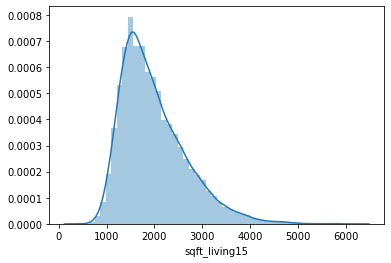

In [332]:
# From max above, looks like there are outliers. Plotting to visualize. There is clear outliers with values 5k+
sns.distplot(data['sqft_living15'])

In [333]:
# How many above 5k? 23
data[data['sqft_living15'] >= 5000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category,has_basement,has_been_renovated
41,8835800350,2015-01-12,1950000.0,4,3.25,7420,167869,2.0,0.0,3.0,...,5610,169549,2015,1,Jan,Winter,1,High,0,0
58,715010530,2015-01-13,1880000.0,5,3.50,4410,13000,2.0,0.0,3.0,...,5790,12969,2015,1,Jan,Winter,1,High,1,0
406,2524069078,2015-01-22,2700000.0,4,4.00,7850,89651,2.0,0.0,0.0,...,6210,95832,2015,1,Jan,Winter,1,High,0,0
548,6752500090,2015-01-27,1840000.0,4,3.50,4870,39190,2.0,0.0,0.0,...,5000,33880,2015,1,Jan,Winter,1,High,0,0
1106,7237501190,2014-10-10,1780000.0,4,3.25,4890,13402,2.0,0.0,0.0,...,5790,13539,2014,10,Oct,Fall,1,High,0,0
1609,715010140,2014-10-02,1750000.0,5,3.25,5790,12739,2.0,0.0,3.0,...,5790,13928,2014,10,Oct,Fall,1,High,1,0
4547,3303850390,2014-12-12,2980000.0,5,5.50,7400,18898,2.0,0.0,3.0,...,6110,26442,2014,12,Dec,Winter,1,High,1,0
4582,8678500020,2014-12-13,1580000.0,4,3.50,5830,131116,2.0,0.0,0.0,...,5340,207206,2014,12,Dec,Winter,1,High,0,0
6211,715010130,2015-02-02,1750000.0,6,4.25,5860,13928,2.0,0.0,3.0,...,5790,13928,2015,2,Feb,Winter,1,High,1,0
6837,2954400020,2015-02-05,1150000.0,4,3.75,4160,35000,2.0,0.0,0.0,...,5330,36446,2015,2,Feb,Winter,1,High,0,0


In [334]:
# Overview of sqft_lot15
data['sqft_lot15'].describe()

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

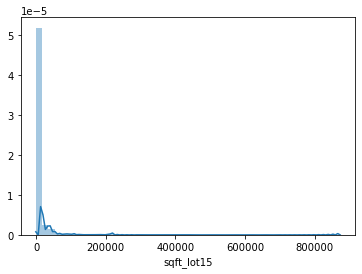

In [335]:
# From max above, looks like there are outliers. Plotting to visualize. Many extreme values to account for
sns.distplot(data['sqft_lot15'])

In [336]:
# Correct for extreme values used for categorical columns
# Filled nulls for ['view'] = 99.0 (extreme value) -- fill with previous mean 0.233863
data['view'].replace(99.0, 0.233863, inplace=True)

In [337]:
# Check work
data.groupby(by='view')['id'].count()

view
0.000000    19422
0.233863       63
1.000000      330
2.000000      957
3.000000      508
4.000000      317
Name: id, dtype: int64

In [338]:
# Filled nulls for ['sqft_basement'] = 9999.0 (extreme value) -- fill with previous mean 291.9
data['sqft_basement'].replace(9999.0, 291.9, inplace=True)

In [339]:
# Check work
data[data['sqft_basement'] == 291.9]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,yr_of_sale,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category,has_basement,has_been_renovated
35,8682261190,2015-01-12,550285.0,2,1.75,1680,4500,1.0,0.0,0.0,...,1670,4500,2015,1,Jan,Winter,1,Average,0,0
50,8832900135,2015-01-13,769000.0,5,2.25,3320,13138,1.0,0.0,2.0,...,2820,13138,2015,1,Jan,Winter,1,Average,0,0
52,6303400981,2015-01-13,190000.0,3,1.75,1160,5850,1.0,0.0,0.0,...,1110,8382,2015,1,Jan,Winter,1,Average,0,0
80,8682261440,2015-01-13,579000.0,2,1.75,1560,4500,1.0,0.0,0.0,...,1860,4500,2015,1,Jan,Winter,1,Average,0,0
279,7129303240,2015-01-02,332500.0,3,2.00,1600,7995,1.0,0.0,0.0,...,2440,6900,2015,1,Jan,Winter,1,Average,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21330,5700000465,2014-09-04,666000.0,3,2.50,3000,5000,1.5,0.0,0.0,...,1970,5000,2014,9,Sep,Fall,1,Average,0,0
21460,7211400506,2014-09-08,265000.0,3,2.50,1410,2500,2.0,0.0,0.0,...,1290,5190,2014,9,Sep,Fall,1,Average,0,0
21499,6909200401,2014-09-08,536500.0,4,2.50,1720,3515,2.0,0.0,2.0,...,1140,2208,2014,9,Sep,Fall,1,Average,0,0
21528,3904920980,2014-09-09,648000.0,4,2.50,2740,9959,2.0,0.0,0.0,...,2630,9905,2014,9,Sep,Fall,1,Average,0,0


In [340]:
# Found some of these zipcodes populated in Seattle. Create a Boolean columns
# List of Seattle zipcodes (https://www.usmapguide.com/washington/seattle-zip-code-map/) - 57 zipcodes:
# 98101,98102,98103,98104,98105,98106,98107,98108,98109,98110,98111,98112,98114,98115,98116,98117,98118,
# 98119,98121,98122,98124,98125,98126,98129,98131,98132,98133,98134,98136,98138,98144,98145,98146,98148,
# 98151,98154,98155,98158,98160,98161,98164,98166,98168,98170,98171,98174,98177,98178,98181,98184,98185,
# 98188,98190,98191,98195,98198,98199

In [341]:
# Assign variable to list
seattle_zipcodes = [98101,98102,98103,98104,98105,98106,98107,98108,98109,98110,98111,98112,98114,98115,
                    98116,98117,98118,98119,98121,98122,98124,98125,98126,98129,98131,98132,98133,98134,
                    98136,98138,98144,98145,98146,98148,98151,98154,98155,98158,98160,98161,98164,98166,
                    98168,98170,98171,98174,98177,98178,98181,98184,98185,98188,98190,98191,98195,98198,98199]

In [342]:
# Preview count of records are in seattle
data[data['zipcode'].isin(seattle_zipcodes)]['id'].count()

8973

In [343]:
# Create new column
data['in_seattle'] = 0

In [344]:
for row in data['in_seattle'].index:
    if data['zipcode'][row] in seattle_zipcodes:
         data['in_seattle'][row] = 1 
    else:
        data['in_seattle'][row] = 0

<ipython-input-344-27959841d292>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['in_seattle'][row] = 0
<ipython-input-344-27959841d292>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['in_seattle'][row] = 1


In [345]:
# Check work, 1 count matches
data.groupby(by='in_seattle')['id'].count()

in_seattle
0    12624
1     8973
Name: id, dtype: int64

In [346]:
data.groupby(by='in_seattle')['id'].count()

in_seattle
0    12624
1     8973
Name: id, dtype: int64

In [347]:
data['bedrooms'].describe()
# outliers

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [348]:
# 5 bedroom is single family home, 
data[data['bedrooms'] > 5]['id'].count()

334

In [349]:
334/21597 
# Losing only 1.5% of data if don't use these

0.015465110895031718

In [350]:
# Create Boolean column
data['single_fam_home'] = 0

# For each value in data['bedrooms'], if <=5 put 1 single_fam_home; 0 if >5 bedrooms
for row in data['bedrooms'].index:
    if data['bedrooms'][row] <= 5:
        data['single_fam_home'][row] = 1
    else:
        data['single_fam_home'][row] = 0

<ipython-input-350-279265b09a9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_fam_home'][row] = 1
<ipython-input-350-279265b09a9c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['single_fam_home'][row] = 0


In [351]:
# Check work 0s match 334 calculates above
data.groupby(by='single_fam_home')['id'].count()

single_fam_home
0      334
1    21263
Name: id, dtype: int64

In [352]:
# For plotting adding price in thousands
data['price_in_thousands'] = data['price']/1000

In [353]:
# Preview additional column
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,mon_of_sale_num,mon_of_sale_name,season_of_sale,has_been_viewed,grade_category,has_basement,has_been_renovated,in_seattle,single_fam_home,price_in_thousands
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,1,Jan,Winter,1,Average,0,0,0,1,325.0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,1,Jan,Winter,1,Average,1,0,1,1,540.0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,1,Jan,Winter,1,Average,0,0,1,1,344.0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,1,Jan,Winter,1,Average,0,0,0,1,565.0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,1,Jan,Winter,1,Average,0,0,0,1,320.0


In [354]:
# Overview of final data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  21597 non-null  int64         
 1   date                21597 non-null  datetime64[ns]
 2   price               21597 non-null  float64       
 3   bedrooms            21597 non-null  int64         
 4   bathrooms           21597 non-null  float64       
 5   sqft_living         21597 non-null  int64         
 6   sqft_lot            21597 non-null  int64         
 7   floors              21597 non-null  float64       
 8   waterfront          21597 non-null  float64       
 9   view                21597 non-null  float64       
 10  condition           21597 non-null  int64         
 11  grade               21597 non-null  int64         
 12  sqft_above          21597 non-null  int64         
 13  sqft_basement       21597 non-null  float64   

In [355]:
# Saving edited data to new file
data.to_csv('data_cleaned.csv', index=False)

## Now have final cleansed data. Data Discovery notebook